# Quantum Dots

One of the main benefits of performing simulations from the perspective of the source rather than from the perspective of the light is that we have full control over modelling the physics of a realistic device. Most importantly, this allows for simulating many realistic imperfections, estimating device limitations, and optimising experimental parameters. It also provides an excellent tool for learning about how the device operates and for performing virtual experiments to compare with real data or design new protocols. In this example, we will explore three different source types based quantum dots: the exciton, the biexciton, and the trion.

## Exciton

When a neutral (empty) quantum dot in its ground state $|g\rangle$ is excited by a quick laser pulse, an electron-hole pair is formed. This bound pair effectively behaves as a single particle, called an exciton (denoted by X), and it becomes trapped in a three-dimensional potential well until it recombines to emit a single photon. For a perfectly symmetric quantum dot, the orbitals available to the exciton are degenerate in energy. Thus, for many experiments, it is sufficient to model the quantum dot as a two-level emitter. However, if there is a slight distortion of the potential well, due to a physical distortion of the quantum dot or simply an asymmetric strain in the lattice, the degeneracy is lifted and the exciton will occupy one of two quantum dot states split by a small fine structure splitting $\Delta_\text{fss}$. This fine structure splitting can play a crucial role in the properties of the emitted photons, especially when the emission is subsequently filtered in polarisation.

In [15]:
from zpgenerator import *
import numpy as np
import matplotlib.pyplot as plt

ZPGenerator provides a catalogue exciton source with all the necessary physics already defined, accessible via the exciton() class method the Source factory class.
For more details on the model underlying the exciton() source type, please see [Sources](sources_catalogue.ipynb). For now, let's take a look at some interesting features that distinguish this source model from a basic two-level emitter.

In [16]:
source = Source.exciton(pulse=Pulse.dirac())

We can first inspect the states available for us to manipulate, and check that the default initial state is the ground state. As discussed above, we have three different levels, one ground state and two orthogonal excited states.


In [17]:
source.initial_state == source.states['|g>']

True

Similar to the two-level emitter, we are able to control things like the excitation pulse area, pulse delay, and pulse width in addition to the decay rate and the dephasing rate of our emitter. However, we now have additional options to modify

In [18]:
source.default_parameters

{'resonance': 0,
 'fss': 0,
 'decay': 1.0,
 'theta_c': 0,
 'phi_c': 0,
 'dephasing': 0,
 'dephasing_fss': 0,
 'area': 3.141592653589793,
 'phase': 0,
 'delay': 0,
 'theta': 0,
 'phi': 0,
 'efficiency': 1}

We can change the excitation pulse linear polarisation angle 'theta' and phase 'phi'. We can also control the fine structure splitting 'fss' or add a specific dephasing 'dephasing_fss' of superposition states of the two excited states. Finally, we can modify the linear polarisation collection angle 'theta_c' and polarisation phase 'phi_c'. This is equivalent to putting a waveplate in the collection path.

Unlike the two-level source model, the exciton has two orthogonal emission modes, one arising from the recombination of the $|x\rangle$ exciton state and another from the $|y\rangle$ state. So, when we want standard figures of merit describing our source, we must choose to analyse one output mode or the other using the 'port' keyword.

In [19]:
source.photon_statistics(port=0).display()
source.photon_statistics(port=1).display()

Number  | Probability
0       | 0.00000
1       | 1.00000
2       | 0.00000
3       | 0.00000
4       | 0.00000

Number  | Probability
0       | 1.00000
1       | 0.00000
2       | 0.00000
3       | 0.00000
4       | 0.00000



When using a dirac pulse, one mode of the exciton source behaves like a perfect two-level source while the other mode produces no light at all. The initial state is the ground state, and the excitation pulse polarization defaults to H to target only the $|x\rangle$ excited state. As a result, we see that mode 0 (H) is in a perfect single photon state. On the other hand, we can see that there is a warning when computing $g^{(2)}$ for mode 1 (V) because it cannot normalise by the average photon number $\mu = 0$ for that mode. We can modify the excitation polarization using the 'theta' parameter to excite the $|y\rangle$ state.

In [20]:
source.update_default_parameters(parameters={'theta': np.pi/2})
source.photon_statistics(port=0).display()
source.photon_statistics(port=1).display()

Number  | Probability
0       | 1.00000
1       | 0.00000
2       | 0.00000
3       | 0.00000
4       | 0.00000

Number  | Probability
0       | 0.00000
1       | 1.00000
2       | 0.00000
3       | 0.00000
4       | 0.00000



If we rotate our excitation polarisation by $\pi/2$, we now target just the $|y\rangle$ excited state, which switches the statistics from mode 0 to mode 1. Applying a diagonal D = H + V excitation polarization of $\theta = \pi/4$ gives a 50:50 split of emission into modes 0 and modes 1.

In [21]:
source.update_default_parameters(parameters={'theta': np.pi/4})
source.photon_statistics(port=0).display()
source.photon_statistics(port=1).display()

Number  | Probability
0       | 0.50000
1       | 0.50000
2       | 0.00000
3       | 0.00000
4       | 0.00000

Number  | Probability
0       | 0.50000
1       | 0.50000
2       | 0.00000
3       | 0.00000
4       | 0.00000



In this case, we are exciting a superposition of $|x\rangle$ and $|y\rangle$, which is then collapsed by the polarization measurement. Of course, we cannot actually prove the coherence between $|x\rangle$ and $|y\rangle$ from these measurements alone: we could have just as well had a classical mixture of $|x\rangle$ and $|y\rangle$. To see a manifestation of this coherence, we can perform a little experiment. Let's add a fine-structure splitting so that, if the exciton states are in a superposition, there will be a natural phase evolution. This means that states like $|+\rangle = (|x\rangle + |y\rangle)/\sqrt{2}$ to $|-\rangle = (|x\rangle - |y\rangle)/\sqrt{2}$ over time. Then, if we collect polarised light via mode 1 that is orthogonal to the excitation pulse polarisation, we should see a coherent beating in the lifetime.

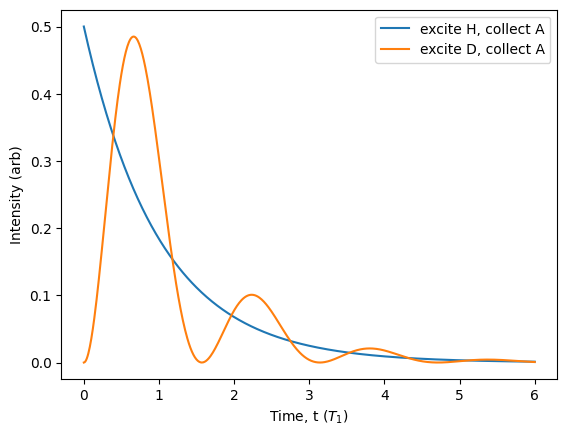

In [22]:
source.plot_lifetime(port = 0, parameters={'theta': 0, 'theta_c': -np.pi/4, 'fss': 4},
                     end=6, label='excite H, collect A')

source.plot_lifetime(port=0, parameters={'theta': np.pi/4, 'theta_c': -np.pi/4, 'fss': 4},
                     end=6, label='excite D, collect A').show()

As expected, for collection along a polarisation not aligned with the exciton axes, we can see a characteristic beating due to the fine structure splitting if we excite a superposition of exciton states. This phenomenon has been extensively exploited to filter the excitation laser in polarisation while still collecting single photons from the device. This allows for resonant excitation of the exciton, but will filter away roughly half of the single photons. For more discussion on how the fine structure impacts the source quality, see [[H. Ollivier et al., ACS Photonics 2020, 7, 4, 1050–1059](https://pubs.acs.org/doi/abs/10.1021/acsphotonics.9b01805)].

One very interesting consequence of this beating is related to the fact that it delays the emission of single photons. Or, in other words, filters only photons that were emitted late with respect to the excitation pulse. This can be seen in the above plot where the initial rise time of the photon is shifted significantly to the right. Since noise causing $g^{(2)}$ arises due to re-excitation of the exciton early in the lifetime, this polarisation filtering also removes most of the noisy photons. As a result, $g^{(2)}$ can have a substantial dependence on the polarisation configuration. To explore this phenomenon, let's switch from using the default perfect pulses to using a default Gaussian pulse shape that produces a small amount of multi-photon emission. Then, we can simply sweep over different excitation polarisation angles and append the value of $g^{(2)}$ predicted by the Source.g2() source class method.

In [23]:
source = Source.exciton(pulse=Pulse.gaussian(), parameters={'fss': 4})

theta_set = np.linspace(0, 1, 40)
g2_data = [[source.g2(port=0, parameters={'theta_c': theta_c, 'theta': theta * np.pi}) for theta in theta_set]
           for theta_c in [0, -np.pi/4]]

Once we have the data, then we can plot!

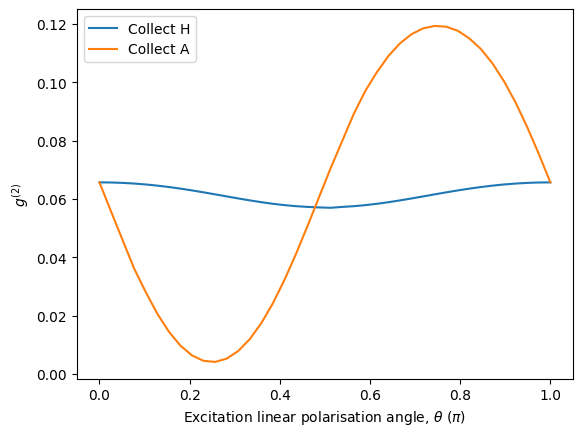

In [24]:
plt.plot(theta_set, g2_data[0], label="Collect H")
plt.plot(theta_set, g2_data[1], label="Collect A")
plt.xlabel("Excitation linear polarisation angle, $\\theta$ ($\pi$)")
plt.ylabel("$g^{(2)}$")
plt.legend()
plt.show()

In the above plot, we can explicitly see that the excitation polarisation plays a big role in determining the multi-photon emission probability. In particular, by choosing to collect only the anti-diagonal A polarisation corresponding to $\theta_\text{c} = -\pi/4$, the $g^{(2)}$ can be significantly suppressed when exciting in the diagonal D polarisation corresponding to $\theta = \pi/4$. This is precisely due to the fact that the emission is delayed by the fine structure splitting.

For now, the value of fine structure splitting is more-or-less fixed when fabricating the device, but there are ways to tune it to optimise the source characteristics [[H. Ollivier et al., Phys. Rev. Lett. 129, 057401 (2022)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.129.057401)]. Let's take a look at how the source quality changes as a function of the magnitude of fine structure splitting.

In [25]:
fss_set = np.linspace(-1, 1.9, 100)  # log scale choices of FSS
mu_data0 = []
g2_data0 = []
for i in [1, -1]:
    source.update_default_parameters(parameters={'theta': np.pi/4, 'theta_c': i * np.pi/4})
    mu_data = []
    g2_data = []
    for fss in fss_set:
        pn = source.photon_statistics(port=0, truncation=2, parameters={'fss': 10**fss})
        mu_data.append(pn.mu())
        g2_data.append(1 - pn.g2())
    mu_data0.append(mu_data)
    g2_data0.append(g2_data)

Let's plot it to see the result!

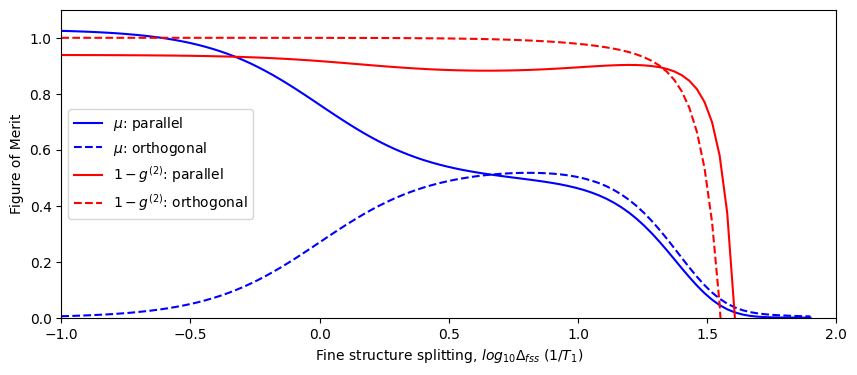

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(fss_set, mu_data0[0], label="$\mu$: parallel", color='b', linestyle='solid')
plt.plot(fss_set, mu_data0[1], label="$\mu$: orthogonal", color='b', linestyle='dashed')
plt.plot(fss_set, g2_data0[0], label="$1 - g^{(2)}$: parallel", color='r', linestyle='solid')
plt.plot(fss_set, g2_data0[1], label="$1 - g^{(2)}$: orthogonal", color='r', linestyle='dashed')
plt.xlabel("Fine structure splitting, $log_{10}\\Delta_{fss}$ ($1/T_1$)")
plt.ylabel("Figure of Merit")
plt.legend()
plt.ylim([0, 1.1])
plt.xlim([-1, 2])
plt.show()

In the above plot, we can see the average photon number $\mu$ (in blue) and a lower bound on the single-photon purity $1 - g^{(2)}$ (in red) as a function of fine structure splitting (in log scale) for two different cases: (1) excitation and collection in the diagonal D polarisation (the parallel configuration, solid curves), (2) excitation in the D polarisation and collection in the anti-diagonal A polarisation (the orthogonal configuration, dashed curves). When the FSS is much smaller than the emitter linewidth, we only see light when collecting parallel to the excitation polarisation because there is not enough time for the FSS phase rotation to occur before spontaneous emission. As we increase the FSS, this phase rotation becomes faster, decreasing the period of the beating to be on the order of the spontaneous emission time. At the point where it is fast compared to the lifetime, we see both parallel and orthogonal collection configurations have roughly equal average photon numbers. In other words, the FSS phase rotation is so fast that it no longer plays a significant role. However, if we continue to increase the FSS, eventually we separate $|x\rangle$ and $|y\rangle$ so far apart that they are no longer resonant with the excitation pulse, which is tuned to be half-way between the two states. Thus, both parallel and orthogonal collection efficiencies decrease dramatically along with the single-photon purity.

## Biexciton

Another interesting quantum dot state is the biexciton state. This state occurs when a neutral quantum dot captures two excitons. In that case, the two excitons occupy both the $|x\rangle$ and $|y\rangle$ states, which behaves like a single biexciton particle, usually denoted XX. Here, we will denote the biexciton quantum state as $|b\rangle$. Similar to adding electrons to orbitals of an atom, the energy required to create a second exciton captured by the quantum dot is not necessarily the same as the energy required to create the first exciton captured by the quantum dot. This is due to a binding energy, i.e. the energy due to the attractive or repulsive force between two exciton particles. In essence, this means that the transition frequency from biexciton state to the exciton state is not the same as the transition frequency from the exciton state to the ground state.

One very interesting consequence of the binding energy is that the biexciton system does not behave like an ideal three-level ladder system. On the one hand, we are able to target just the exciton state without populating the biexciton state, provided that the spectral shape of our pulse is narrow enough. On the other hand, if we detune our excitation pulse such that it matches exactly half the energy required to excite the quantum dot ground state $|g\rangle$ to the biexciton state $|b\rangle$, it is possible to cause the quantum dot to directly absorb two photons, bypassing the intermediate exciton state and populating just the biexciton state. This is known as two-photon excitation (TPE).

Let's explore the features of the biexciton system using ZPGenerator.

In [27]:
from zpgenerator import *
import numpy as np
import matplotlib.pyplot as plt

The biexciton catalogue source gives us access to new parameters related to the four-level biexciton system. For more details on the model underlying the biexciton() source type, please see [Sources](sources.ipynb).

In [28]:
Source.biexciton().default_parameters

{'resonance': 0,
 'fss': 0,
 'binding': 100,
 'decay': 1.0,
 'theta_c': 0,
 'phi_c': 0,
 'decay_b': 2,
 'theta_bc': 0,
 'phi_bc': 0,
 'dephasing': 0,
 'dephasing_fss': 0,
 'width': 0.1,
 'area': 3.141592653589793,
 'detuning': 0,
 'phase': 0,
 'delay': 0,
 'theta': 0,
 'phi': 0,
 'efficiency': 1}

In addition to the parameters added by the exciton, we also now have biexciton parameters like the binding energy 'binding', and the biexction-to-exciton transition polarisation (via 'theta_bc' and 'phi_bc') and rate 'decay_b'. The binding energy is the additional energy supplied due to the attractive nature of two excitons, thus reducing the amount of energy required to go from the exciton to the biexciton state.

The biexciton source is peculiar because it does not behave in a realistic way when using dirac pulses. This is because we now have multiple transitions at different resonant frequencies, and a dirac pulse in time will excite all frequencies equally and simultaneously. This can cause unexpected behaviour if we are not aware of it. So, let's switch right away to a more realistic Gaussian pulse shape.

In [29]:
source = Source.biexciton(pulse=Pulse.gaussian(parameters={'width': 0.1}))

Note that the default exciton 'resonance' is 0 with respect to the global reference. We can see this reflected in the average photon number collected in mode 0, which is nearly 1 while the other transitions emit roughly zero light.

In [30]:
for i in range(4):
    print(source.mu(i, parameters={'binding': 100}))

1.028360012982632
0.00064960756611665
0.0006496017403545551
0.0006496075654505162


When the collection angles and phases 'theta_c', 'theta_bc', 'phi_b', and 'phi_bc' are all zero, the modes represent the transitions 0: $|x\rangle\rightarrow|g\rangle$, 1: $|y\rangle\rightarrow|g\rangle$, 2: $|b\rangle\rightarrow|x\rangle$, and 3: $|b\rangle\rightarrow|y\rangle$ corresponding to polarisations H (X), V (X), H (XX), and V (XX).

Let's see if we can accomplish TPE by sweeping our laser detuning and seeing how the brightness of mode 0 responds. This technique of sweeping the excitation frequency and monitoring the intensity of the response is known as photoluminescence excitation (PLE). Commonly, this is done for multiple sweeps while increasing the excitation power to get a detailed picture of the system.

In [31]:
detunings = np.linspace(-80, 40, 40)  # sweep from -80 to +40 in units of exciton linewidth
areas = np.linspace(1, 10, 40)  # pulse area going from pi-pulse up to a 10pi pulse
mu_set = [[source.mu(0, parameters={'detuning': x, 'area': np.pi * y}) for x in detunings] for y in areas]

Once our data is generated, we can plot the map:

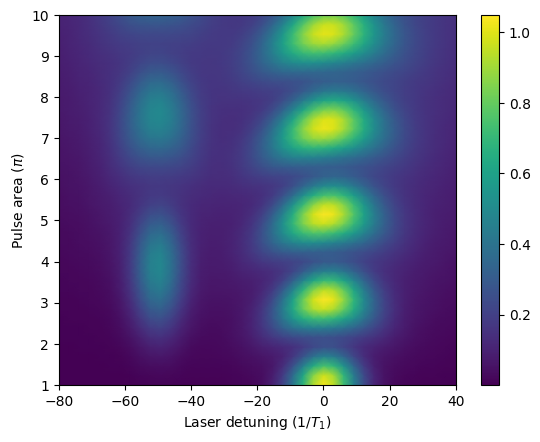

In [32]:
fig, ax = plt.subplots()
plt.pcolormesh(detunings, areas, mu_set, shading='gouraud')
plt.colorbar(ax=ax)
plt.xlabel("Laser detuning ($1/T_1$)")
plt.ylabel("Pulse area ($\pi$)")
plt.show()

Notice that we can see the usual Rabi oscillations when our laser is resonant with the exciton transition. However, by red-detuning to half the binding energy 'detuning' = -50, we notice that a second resonance appears when we increase the pulse area. This is TPE.

In the above case, we are only looking at one exciton transition. When the laser is resonant, we are fully populating the $|x\rangle$ state and hence $\mu\simeq 1$. But, through the TPE resonance, we are occupying $|b\rangle$, which then decays 50:50 to both $|x\rangle$ and $|y\rangle$. Hence, we only see up to $\mu\simeq 0.5$ because the other half of the emission is polarised orthogonally to our collection polarisation.

Now that we have located the TPE at roughly 'detuning' = -50 and 'area' = $4\pi$, we can take a look at some properties of the biexciton source. First, let's plot the lifetime:

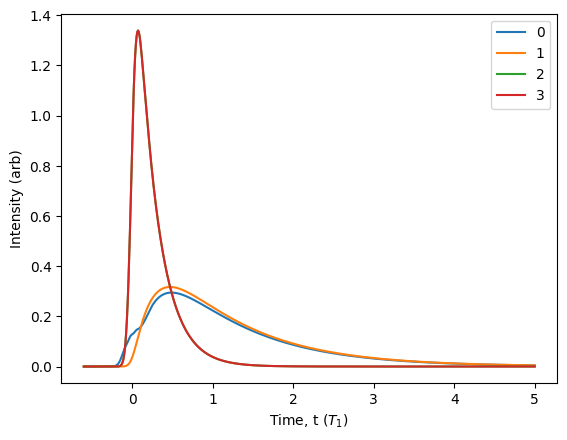

In [33]:
source = Source.biexciton(pulse=Pulse.gaussian(parameters={'width': 0.1, 'detuning': -50, 'area': 4 * np.pi}))
for i in range(4):
    source.plot_lifetime(i, end=5)

From this lifetime, we can see that the TPE brings the QD into the biexciton state quite quickly, which then relaxes down to the exciton state. Both the modes 2 and 3 are producing light (the red curve overlaps the green curve). As the exciton becomes populated by the decaying biexciton state, it too begins to produce light in modes 0 and 1. Interestingly, these are not identical, and the reason is that the excitation pulse is polarized along the mode 0 (H) polarization. This means that the $|x\rangle$ exciton state is populated by the excitation pulse directly, leading to a small initial emission around $t=0$.

This cascade of biexciton to exciton has been historically very promising for generating polarization-entangled Bell pairs. This is because a photon emitted into mode 3 will imply a second photon emitted into mode 1 (both with V polarization). Likewise, a photon emitted into mode 2 will imply a second photon emitted into mode 0 (both with H polarization). Let's take a look at these correlations using the probs() method of the Processor class.

In [34]:
qpu = Processor() // Source.biexciton(pulse=Pulse.gaussian(parameters={'width': 0.1}))
qpu.add([0, 1, 2, 3], Detector.threshold())  # adds a threshold detector to monitor modes 0, 1, 2, 3

qpu.probs(parameters={'detuning': -50, 'area': 4*np.pi}).display()

Pattern | Probability
0 0 0 0 | 0.00333
0 0 1 0 | 0.01760
0 1 0 1 | 0.48503
0 1 1 1 | 0.01128
1 0 0 0 | 0.00987
1 0 1 0 | 0.46364
1 1 0 1 | 0.00726
1 1 1 1 | 0.00199



Recall the modes are ordered by default such that 1010 represents the detection of an H-polarised photon from the X to ground transition and an H-polarised photon from the XX to X transition. Similarly, 0101 represents the detection of a V-polarised photon from the X to ground transition and a V-polarised photon from the XX to X transiton. In other words, these statistics show that the photonic state we are producing may be of the form $(|HH\rangle + |VV\rangle)/\sqrt{2}$, which is a polarisation encoded-Bell state. However, to be sure we have $(|HH\rangle + |VV\rangle)/\sqrt{2}$ and not a classical mixture $(|HH\rangle\langle HH| + |VV\rangle\langle VV|)/2$, we must check to see if these correlations remain regardless of the polarisation basis.

In [35]:
qpu.probs(parameters={'detuning': -50, 'area': 4*np.pi,
                      'theta_c': np.pi/4, 'phi_c': np.pi/2,  # let's rotate our X collection polarisation to R = H + V
                      'theta_bc': np.pi/4, 'phi_bc': np.pi/2}  # same for the XX collection
          ).display()

Pattern | Probability
0 0 0 0 | 0.00333
0 0 0 1 | 0.00871
0 0 1 0 | 0.00871
0 0 1 1 | 0.00017
0 1 0 0 | 0.00448
0 1 0 1 | 0.04665
0 1 1 0 | 0.42781
0 1 1 1 | 0.00567
1 0 0 0 | 0.00448
1 0 0 1 | 0.42781
1 0 1 0 | 0.04665
1 0 1 1 | 0.00567
1 1 0 0 | 0.00091
1 1 0 1 | 0.00364
1 1 1 0 | 0.00364
1 1 1 1 | 0.00165



After rotating the collection polarisation, we indeed see that we still have correlations, but now it is anti-correlated 0110 = LR and 1001 = RL! This is exactly expected when applying the change of basis to the HH+VV Bell state.

One big issue facing the experimental implementation of determinstic Bell state generation is the fine structure splitting. Recall from the previous section that the exciton state can have a small splitting between $|x\rangle$ and $|y\rangle$. If this splitting is too large, then the frequency of the H and V polarisations will no longer be identical and this gives "which path" information about the biexction cascade, degrading the polarisation correlations. To see this in action, let's look at the four correlations 1010, 0110, 1001, and 0101 as a function of the fine structure splitting.

In [36]:
qpu.update_default_parameters(parameters={'detuning': -50, 'area': 4*np.pi,
                           'theta_c': np.pi/4, 'phi_c': np.pi/2,  # let's rotate our collection polarisation to R
                           'theta_bc': np.pi/4, 'phi_bc': np.pi/2})

fss_set = np.linspace(-5, 5, 100)
correlation_set = [[], [], [], []]
labels = [[(1,0,1,0), 'RR', 'solid'], [(0,1,1,0), 'LR', 'solid'], [(1,0,0,1), 'RL', 'dashed'], [(0,1,0,1), 'LL', 'dashed']]
for fss in fss_set:
    pn = qpu.probs(parameters={'fss': fss})
    for i in range(0, 4):
        correlation_set[i].append(pn[labels[i][0]])

Plotting this, we see:

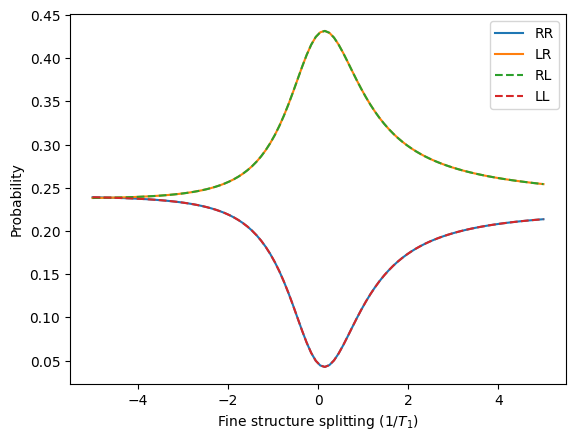

In [37]:
for i in range(0, 4):
    plt.plot(fss_set, correlation_set[i], label=labels[i][1], linestyle=labels[i][2])
plt.xlabel("Fine structure splitting ($1/T_1$)")
plt.ylabel("Probability")
plt.legend()
plt.show()

The correlations in the circular-polarisation basis only exist when the fine structure splitting is small. Interestingly, we can also see that the shape is not symmetric about zero, which is because the excitation pulse is H-polarised and so changing the FSS effectively also changes the detuning between the exciton $|x\rangle$ state and the laser.

As a final demonstration with the biexciton source, we will look into the infamous 'crux' of using a biexciton cascade to produce entangled pairs. In this paper [[E. Schöll, Phys. Rev. Lett. 125, 233605 2020](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.233605)], the authors detail how it is extremely difficult to obtain highly-indistinguishable photons from a biexciton cascade. This is due to the time jitter. In other words, if the XX photon is emitted early, then the X photon will also likely be emitted early. Similarly, if the XX photon is emitted late, then the X photon will also likely be emitted late. This correlation in time between the XX and X photons restricts the indistinguishability of two photons subsequently emitted from XX or two photons subsequently emitted from X.

In [38]:
source = Source.biexciton(pulse=Pulse.gaussian(parameters={'width': 0.1, 'detuning': -50, 'area': 4 * np.pi}))
for i in range(4):
    source.display_hom(i)

Figure of Merit                | Value
First order number coherence   | 0.0206
Second order number coherence  | 0.0008
Hong-Ou-Mandel visibility      | 0.6438
Mean wavepacket overlap        | 0.7225

Figure of Merit                | Value
First order number coherence   | 0.0000
Second order number coherence  | 0.0000
Hong-Ou-Mandel visibility      | 0.7804
Mean wavepacket overlap        | 0.7891

Figure of Merit                | Value
First order number coherence   | 0.0259
Second order number coherence  | 0.0021
Hong-Ou-Mandel visibility      | 0.5625
Mean wavepacket overlap        | 0.6592

Figure of Merit                | Value
First order number coherence   | 0.0000
Second order number coherence  | 0.0000
Hong-Ou-Mandel visibility      | 0.7676
Mean wavepacket overlap        | 0.7764



Looking above, we can clearly see that the mean wavepacket overlaps of photons from all 4 transitions are quite limited compared to what we would expect from resonant excitation. In the 'crux' paper, they discuss how the only regime where this effect is eliminated is when the XX to X transition is much faster than the X to ground transition. Let's explore that by looking at the average mean wavepacket overlap of the 4 transitions as a function of the biexciton decay parameter 'decay_b'. For this, let's turn off the excitation pulse and artificially prepare our quantum dot in the biexciton state to be sure that our laser pulse parameters are not influencing the phenomenon we are replicating.

In [39]:
source = Source.biexciton(pulse=Pulse.dirac(parameters={'area': 0}), gate=[0, 20])
source.initial_state = source.states['|b>']

M_set = []
decays = np.linspace(-1.5, 1.5, 20)  # decay rate of the biexciton state in logscale
for decay in decays:
    for i in range(4):
        source.hom(i, parameters={'decay_b': 10**-decay})
    M_set.append(sum(source.quality[str(i)]['M'] for i in range(0, 4))/4)

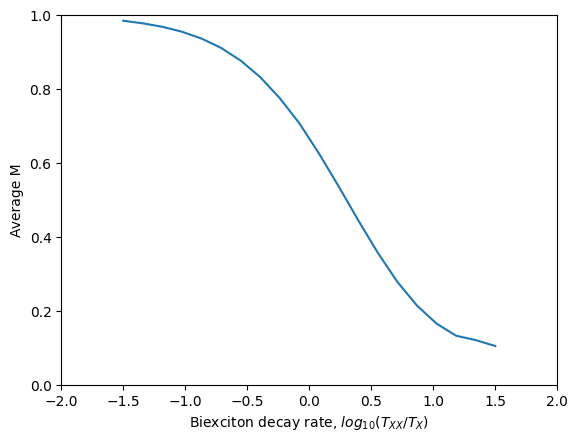

In [40]:
plt.plot(decays, M_set)
plt.xlabel("Biexciton decay rate, $log_{10}(T_{XX}/T_{X})$")
plt.ylabel("Average M")
plt.xlim([-2, 2])
plt.ylim([0, 1])
plt.show()

In the above plot, we indeed see a qualitative replication of the result published in figure 3 panel c of the 'crux' paper. The mean wavepacket overlap is only large when the lifetime of the biexciton state $T_{XX}$ is very short compared to the lifetime of the exciton state $T_{X}$.

## Trion

Because ZPGenerator is a source-physics simulator, we have direct access to properties of the source. This becomes critical when simulating experiments where the quantum dynamics of the source play an important role, such as a spin-photonic device. One quantum system that allows for implementing interesting spin-photonic protocols is the charged quantum dot system. When the quantum dot captures a single particle (an electron or hole), it has a spin doublet ground state (spin up and spin down). Optical excitation of this quantum dot state produces an exciton (electron-hole pair) so that there is also a spin doublet excited state (spin up + exciton and spin down + exciton) called a trion state. Thus, a trion system refers to a four-level system. Let's explore how to simulate properties of a source constructed from a trion system.

Without getting too deep into the physics, we can initialise the catalogue quantum dot trion source using the trion() method of the Source factory. In this case, there are two choices for the 'charge' keyword: (1) a 'negative' trion or (2) a 'positive' trion. The differences are subtle, but can play an important role in the photonic errors produced by the source. In the example given here, both the negative and positive trions will behave identically, and so we choose to use the 'negative' trion without loss of generality.

In [41]:
from zpgenerator import *
import numpy as np
import matplotlib.pyplot as plt

source = Source.trion(charge='negative')

We can inspect this object to see what properties it has. For example, we can look at the possible system states stored as a dictionary of [QuTiP](https://qutip.org/) quantum objects ([Qobj](https://qutip.org/docs/latest/apidoc/classes.html)).

In [42]:
source.states

{('|spin_up>',): Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]], ('|spin_down>',): Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]], ('|trion_up>',): Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]], ('|trion_down>',): Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]}

This makes manipulating source states simple via the operations defined by QuTiP. For example, we can define our qubit states for quantum information processing. Then, we can make custom states:

In [43]:
st0 = source.states['|spin_up>']  # computational state |0>
st1 = source.states['|spin_down>']  # computational state |1>

st_plus = (st0 + st1)/np.sqrt(2)  # computational state |+> = (|0> + |1>)/sqrt(2)

print(st_plus)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]


By default, the pre-built trion source is initialised in a fully mixed ground spin doublet, which is usually the case in the lab.

In [44]:
print(source.initial_state)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


To modify the initial state, we can simply set the property source.initial_state to our desired initial state. For now, let's continue with the default settings.

Let's now also look at the source parameters we can modify.

In [45]:
source.default_parameters

{'resonance': 0,
 'Bx': 0,
 'By': 0,
 'Bz': 0,
 'g_spin': 2,
 'g_trion': 2,
 'Bx_OH': 0,
 'By_OH': 0,
 'Bz_OH': 0,
 'decay': 1.0,
 'theta_c': 0.7853981633974483,
 'phi_c': -1.5707963267948966,
 'dephasing': 0,
 'dephasing_spin': 0,
 'dephasing_trion': 0,
 'area': 3.141592653589793,
 'phase': 0,
 'delay': 0,
 'theta': 0.7853981633974483,
 'phi': -1.5707963267948966,
 'efficiency': 1}

To measure the spin coherence time of the charged quantum dot that is initially in a fully mixed state, it is possible to perform a pump-probe experiment in the presence of a transverse static magnetic field, where we excite the quantum dot with two linearly-polarised laser pulses in quick succession. The first linearly-polarised laser pulse excites spin up and spin down states of the quantum dot to the trion up and trion down states, respectively. Then, the emission is monitored in the RL polarisation basis. If an R-polarised photon is detected after the first pulse, the quantum dot is projected onto the spin up state. Due to the transverse magnetic field, this state is no longer an eigenstate and so, from the moment the photon is detected, the spin will begin to precess around the magnetic field direction. After some delay time $\tau$, a second 'probe' pulse is applied that again excites both the spin up and spin down states of the quantum dot. By monitoring the emission after the probe pulse, again in the RL basis, and looking at its correlation with the polarisation detected in the first time bin, we can gain information about the quality of the spin precession.

Let's first prepare our pump-probe pulse sequence. To do this, we initialise a sequence using the Pulse class, then add two ideal pulses: one named 'pump' and another named' probe. Giving the pulses a unique name will allow us to independently tune their parameters. Since we want to excite both R and L transitions using a linearly-polarized pulse, we must increase the pulse area to $\sqrt{2}\pi$.

In [46]:
sequence = Pulse()
sequence.add(Pulse.dirac(parameters={'delay': 0, 'area': np.pi * np.sqrt(2)}, name='pump'))
sequence.add(Pulse.dirac(parameters={'delay': 0, 'area': np.pi * np.sqrt(2)}, name='probe'))

Next, let's make a negatively-charged trion source with a default small static magnetic field of $B_x = \pi/10$ and a spin dephasing rate of $0.1$. In addition, the default transition excited by the pulse is the R-polarized transition. To modify theis, we can set the 'phi' and 'theta' angles of the trion to zero so that the pulses are exciting the H-polarized transition instead.

In [47]:
source = Source.trion(charge='negative', pulse=sequence, gate=[0, float('inf')],
                      parameters={'Bx': 0.1 * np.pi, 'dephasing_spin': 0.1, 'theta': 0, 'phi': 0})

Note that all parameters are assumed to be unitless. A dephasing rate of $0.1$ in this case implies that it is $1/10$ the value of the spontaneous emission rate ($1/T_1$). Similarly, setting $B_x$ to $\pi/10$ with the default g-factor of 2 implies that the spin will perform a full precession ($2\pi$) every $10$ source lifetimes ($T_1$). Altering the g-factor away from its default value of 2 will change how long it takes for the spin to precess for a given value of $B_x$. For more physically-realistic values, a proper unit conversion should be done that includes the Bohr magneton and Plank's constant. In the future, unit conversions will be integrated and handled by a sub-package.

Once we have made our source, we need to define the detectors monitoring for emission following the pump and probe pulses. Since we don't care so much about multi-photon emission, we can use threshold detectors. The first detector, monitoring bin 0 following the pump pulse, will be active from time $t=0$ until the probe pulse arrives. Recall that we named our probe pulse 'probe' and so the delay parameter corresponding to this pulse is 'probe/delay'. We can define a parameterised detector by adding the desired parameter string to the gate interval. We must also specify a default value for this parameter.

In [48]:
detector_bin0 = DetectorGate(1, gate=[0, 'bin_threshold'], parameters={'bin_threshold': 0})


The second detector, monitoring bin 1 following the probe pulse, will be active from the time the probe pulse arrives 'probe/delay' until our source stops producing light.

In [49]:
detector_bin1 = DetectorGate(1, gate=['bin_threshold', float('inf')], parameters={'bin_threshold': 0})

Finally, we combine the source and detectors together in a two-mode Processor. When we add our source to port 0, it will automatically occupy port 0 with the R-polarised emission and port 1 with the L-polarised emission. So, if we wish to detect R-polarised light in the first time bin, we add our first detector (bin 0) to mode 0. For the second time bin, let's assign our detector to monitor both R and L polarisation. This will allow us to look at both RR and RL coincidences.

In [50]:
qpu = Processor() // source
qpu.add(0, detector_bin0, bin_name='Early R')  # time bin 0, R polarisation
qpu.add(0, detector_bin1, bin_name='Late R')  # time bin 1, R polarisation
qpu.add(1, detector_bin1, bin_name='Late L')  # time bin 1, L polarisation

qpu.final_time = 150
delays = np.linspace(0, 120, 240)  # let's get quite a few points
coinc_set_RR = []
coinc_set_RL = []

Once we have generated the data, we can plot it to see the result!

In [51]:
for delay in delays:
    pn = qpu.probs(parameters={'probe/delay': delay, 'bin_threshold': delay})
    coinc_set_RR.append(pn[1, 1, 0])  # ordering follows time then mode so 110 = RR
    coinc_set_RL.append(pn[1, 0, 1])  # 101 = RL

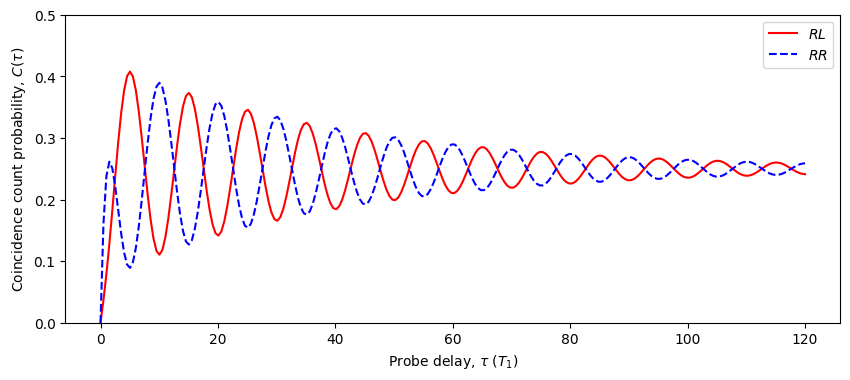

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(delays, coinc_set_RL, label="$RL$", color='red')
plt.plot(delays, coinc_set_RR, label="$RR$", color='blue', linestyle='dashed')
plt.xlabel("Probe delay, $\\tau$ ($T_1$)")
plt.ylabel("Coincidence count probability, $C(\\tau)$")
plt.ylim([0, 0.5])
plt.legend()
plt.show()

As anticipated, we can clearly see the impact of the spin precession on the time-polarisation correlation probabilities. Notably, the RL and RR probabilities oscillate in opposition and have an amplitude that decays exponentially due to spin dephasing. However, when the probe delay is small there is an interesting deviation from this pattern. It makes sense that RL goes to zero because, if R was detected after the first pulse, the second pulse should cause another R to be emitted (the spin had no time to precess in between two fast pulses). However, looking at RL we see that it also goes to zero! This is because we are looking at probabilities as a proportion of all possible outcomes of our detectors. When the delay is small, the most probable outcome is '00' because after the first pulse excites the quantum dot, the second pulse immediately returns it to the ground state, effectively performing a $2\pi$ pulse.